### Objective:
* Analyze with different features of cancer patient for their survival status

Dataset:
* Number of datapoints = 306
* Number of Features = 4
* Independent Features = [age, year, nodes]
* Dependent Features = [status]

Feature Description:
* age: Age of patient
* year: Year of cancer operation
* nodes: Number of axillary lymph nodes
* class label:status
     * 1 = patient survived more than 5 years
     * 2 = patient died within 5 years

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Loading the dataset

In [2]:
data = pd.read_csv("haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Statistics of the dataset

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,306.0,52.457516,10.803452,30.0,44.0,52.0,60.75,83.0
year,306.0,62.852941,3.249405,58.0,60.0,63.0,65.75,69.0
nodes,306.0,4.026144,7.189654,0.0,0.0,1.0,4.00,52.0
status,306.0,1.264706,0.441899,1.0,1.0,1.0,2.00,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
print("Number of datapoints",data.shape)

Number of datapoints (306, 4)


In [6]:
print("Number of features ",data.columns)

Number of features  Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
print("Data points per class: ")
data['status'].value_counts()

Data points per class: 


1    225
2     81
Name: status, dtype: int64

In [8]:
# map the digits '1' to Yes and '2' to No
data['status'] = data['status'].map({1: 'Yes', 2: 'No'})

In [9]:
data['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64

## A) Univariate Analysis:

##  1-D Scatter Plot

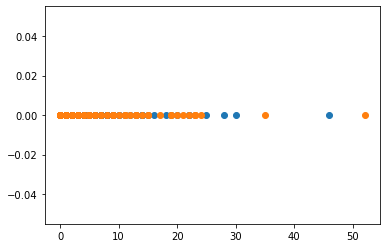

In [10]:
alive = data.loc[data["status"] == "Yes"]
died = data.loc[data["status"] == "No"]

plt.plot(alive['nodes'], np.zeros_like(alive['nodes']), 'o')
plt.plot(died['nodes'], np.zeros_like(died['nodes']), 'o')
plt.show()

Observations:
* Both the classes, class1 and class2 overlap highly
* Very hard to make sense

## Histogram
- Histogram provides the count(on the y-axis) for each of the features on x-axis 


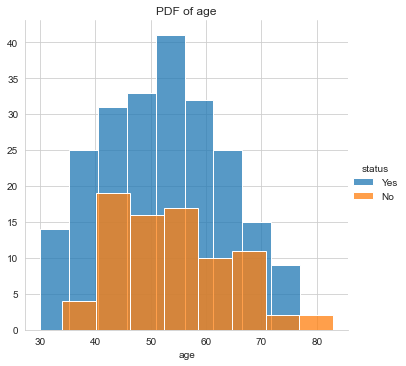

In [11]:
## pdf of age
sns.set_style('whitegrid')
sns.FacetGrid(data, hue="status", height=5).map(sns.histplot, "age").add_legend()
plt.title("PDF of age")
plt.show()

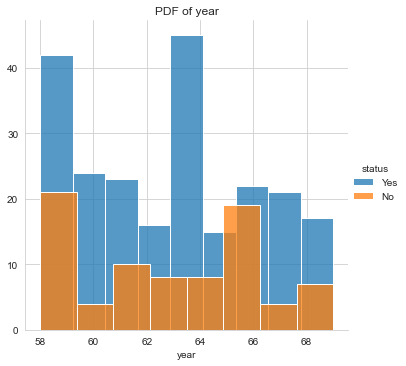

In [12]:
## pdf of year
sns.set_style('whitegrid')
sns.FacetGrid(data, hue="status", height=5).map(sns.histplot, "year").add_legend()
plt.title("PDF of year")
plt.show()

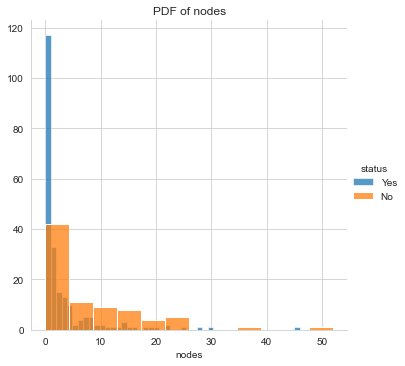

In [13]:
## pdf of nodes
sns.set_style('whitegrid')
sns.FacetGrid(data, hue="status", height=5).map(sns.histplot, "nodes").add_legend()
plt.title("PDF of nodes")
plt.show()

## PDF | CDF
- PDF is a histogram that provides the probable density of a given feature at a certain point on x-axis
- CDF provides us with percentage of a class having specific feature

PDF = [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
Bin_edges = [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]

PDF = [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
Bin_edges = [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


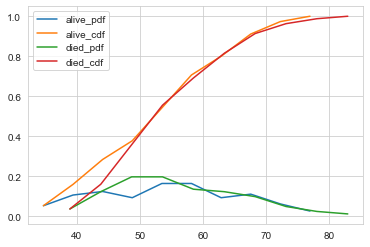

In [14]:
#cdf of age

#Alive
counts, bin_edges = np.histogram(alive['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print("PDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])

#Died
counts, bin_edges = np.histogram(died['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print("\nPDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])


PDF = [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
Bin_edges = [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF = [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
Bin_edges = [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


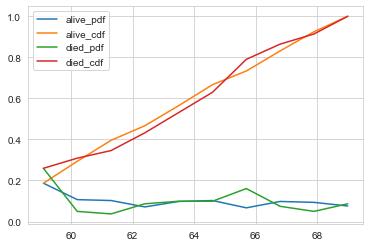

In [15]:
#cdf of year

#Alive
counts, bin_edges = np.histogram(alive['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print("PDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend('status')
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])

#Died
counts, bin_edges = np.histogram(died['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print("\nPDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])


PDF = [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
Bin_edges = [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
PDF = [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
Bin_edges = [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


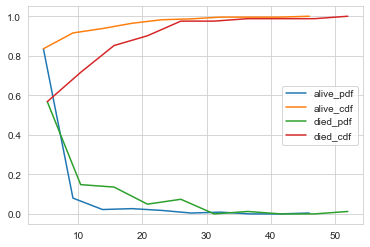

In [16]:
## cdf of nodes

#Alive
counts, bin_edges = np.histogram(alive['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print("PDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])

#Dead
counts, bin_edges = np.histogram(died['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print("PDF =", pdf)
print("Bin_edges =", bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['alive_pdf','alive_cdf', 'died_pdf', 'died_cdf'])


 Observations:
* From above observations we see that classes are highly jumbled

## B) Bi-variate Analysis

## 2-D Scatter Plot

### Age and Year

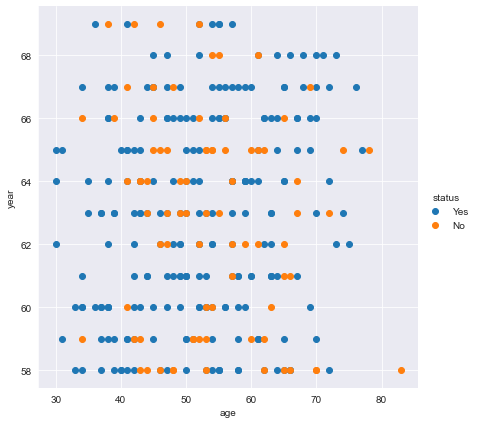

In [17]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="status", height=6).map(plt.scatter, "age", "year").add_legend()
plt.show()

### Age and nodes

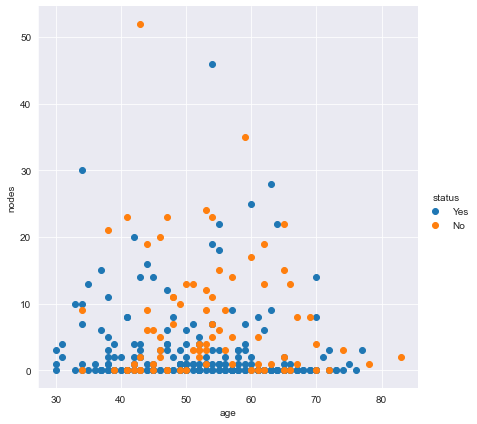

In [18]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="status", height=6).map(plt.scatter, "age", "nodes").add_legend()
plt.show()

### Year and nodes

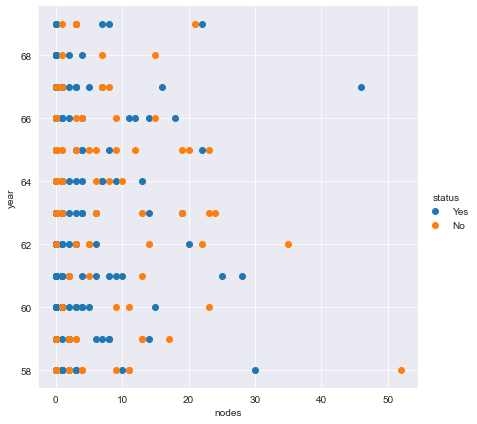

In [19]:
sns.set_style("darkgrid")
sns.FacetGrid(data, hue="status", height=6).map(plt.scatter, "nodes", "year").add_legend()
plt.show()

Observations:
* All the pair of classes are highly jumbled so we could not find any information doing 2-d scatter plot 

## Pair Plots:
As we humans cannot imagine more than three dimensions, we use Pairplots of given features to gain insights from n-dim problems 

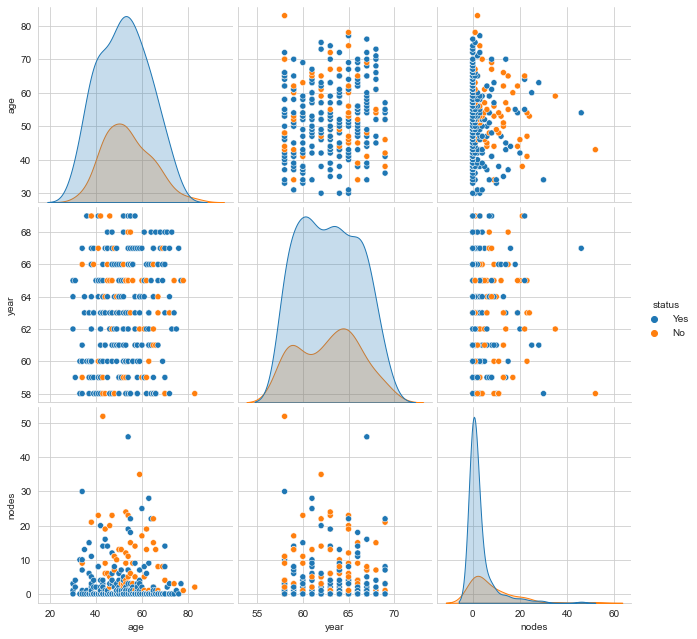

In [20]:
sns.set_style("whitegrid")
sns.pairplot(data, hue='status', height=3)
plt.show()

Observations:
* We cannot classify the two classes as they both are overlap highly

## Box Plots and Whiskers
- Box Plots show the percentiles of a feature
- Whiskers show the maximum and minimun values of a feature

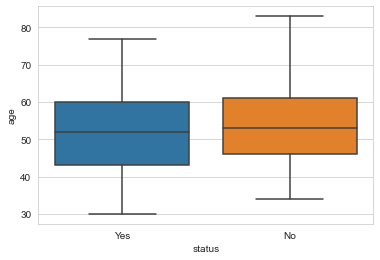

In [21]:
# age
sns.boxplot(x = 'status', y = 'age', data = data)
plt.show()

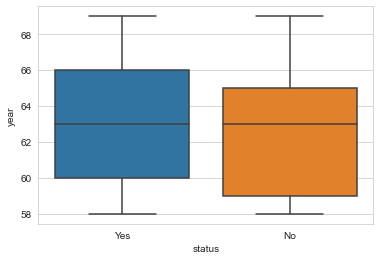

In [22]:
# year
sns.boxplot(x = 'status', y = 'year', data = data)
plt.show()

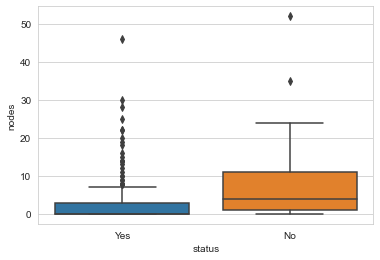

In [23]:
# nodes
sns.boxplot(x = 'status', y = 'nodes', data = data)
plt.show()

## Violin Plots
- Violin Plots combine the Box Plots and PDF Plots

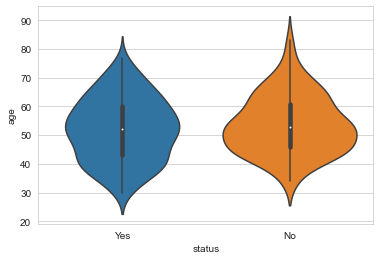

In [24]:
# age
sns.violinplot(x = 'status', y ='age', data = data)
plt.show()

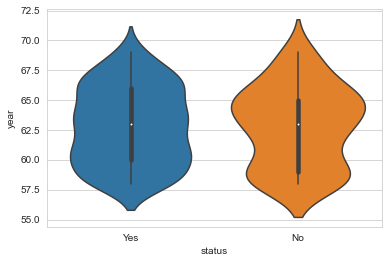

In [25]:
# year
sns.violinplot(x = 'status', y ='year', data = data)
plt.show()

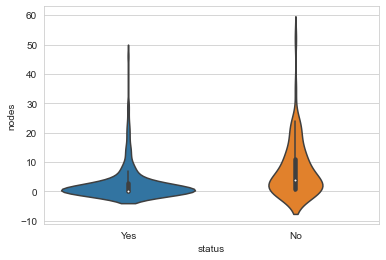

In [26]:
# nodes
sns.violinplot(x = 'status', y ='nodes', data = data)
plt.show()

# Conclusion
- Haberman dataset have small number of features, not so good to get insights
- Two classes are hugely overlaped so we cannot classify two classes